# Plot ROC Curves

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize

In [4]:
glass_data = pd.read_csv('data/dati/glass.data.csv')
glass_data['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [13]:
X = glass_data.drop('Type of glass', axis = 1)
# binarize the output for binary classification
y = label_binarize(glass_data['Type of glass'], classes=[1, 2, 3,4,5,6,7])
labels = [1,2,3,4,5,6,7]

In [14]:
y.shape, X.shape

((214, 7), (214, 10))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# classify instances into more than two classes, one vs rest
# add param to create probabilities to determine Y or N as the classification
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# fit estiamators and return the distance of each sample from the decision boundary
#http://scikit-learn.org/stable/modules/svm.html to see why to use the decision_function
y_score = clf.fit(X_train, y_train).decision_function(X_test)

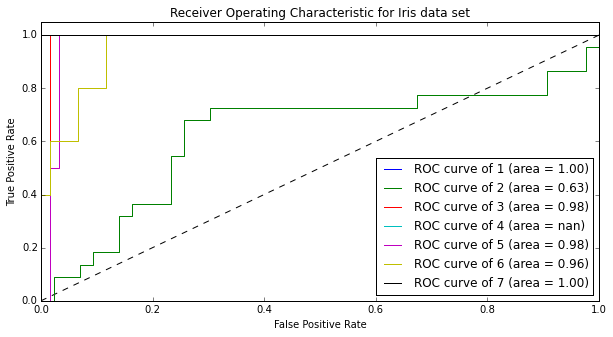

In [19]:
# <help:scikit_roc>
# plot the ROC curve, best for it to be in top left corner
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], 'k--') # add a straight line representing a random model 
for i, label in enumerate(labels):
    # false positive and true positive rate for each class
    fpr, tpr, _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    # area under the curve (auc) for each class
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve of {0} (area = {1:0.2f})'.format(label, roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic for Iris data set')
plt.xlabel('False Positive Rate') # 1- specificity
plt.ylabel('True Positive Rate') # sensitivity
plt.legend(loc="lower right")
plt.show()